# Ford GoBike System Data Exploration
## by Michal Chiagoziem Ezeh

## Introduction
This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.






## Preliminary Wrangling
This document explores a dataset containing the individual rides trip data of the fordgo bike.


In [2]:
# Run this cell if you encounter errors with seaborn later on
#!pip install --upgrade seaborn

In [3]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
import requests
import csv

import warnings
warnings.simplefilter("ignore")

%matplotlib inline

In [4]:
df = pd.read_csv ('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [6]:
#changing data type of start_time and end_time to datetime.
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)

In [7]:
df.bike_share_for_all_trip = (df.bike_share_for_all_trip == 'Yes')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null datetime64[ns]
end_time                   183412 non-null datetime64[ns]
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null bool
dtypes: bool(1), datetime64[ns](2), float64(7), int64(2), object(4)
me

In [9]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


### What is the structure of your dataset?

The dataset contains 183,412 records and 16 features:
<li> duration_sec </li>
<li> start_time
<li>end_time
<li>start_station_id
<li>start_station_name
<li>start_station_latitude
<li>start_station_longitude
<li>end_station_id
<li>end_station_name
<li>end_station_latitude
<li>end_station_longitude
<li>bike_id
<li>user_type
<li>member_birth_year
<li>member_gender
<li>bike_share_for_all_trip.

The datatype of each features are 9 are numerical, 2 are datetime, 4 are object type and 1 is boolean.

### What is/are the main feature(s) of interest in your dataset?

I'm most interested in figuring out how the trip duration is dependent on the other features in this dataset.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?


In supporting my investigation, the following features in which trip duration will be dependent on is the start and end. 
Why do I say so? Stations in more crowded places should receive more rides because of population which will allow the stations take longer times for their rides to end.

I also think time and day when trip starts(start_time), user type, birth year should also affect trip duration.

In [10]:
def get_start_hour(timestamp_obj):
    return timestamp_obj.hour

df['start_hour'] = df.start_time.apply(get_start_hour)
hours = [i for i in range(24)]
cat_hours = pd.api.types.CategoricalDtype(categories = hours, ordered=True)
df.start_hour = df.start_hour.astype(cat_hours)

In [11]:
def get_start_day(timestamp_obj):
    return timestamp_obj.day_name()

df['start_day'] = df.start_time.apply(get_start_day)
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_cat = pd.api.types.CategoricalDtype(categories = days, ordered = True)
df.start_day = df.start_day.astype(day_cat)

In [12]:
cols = ['duration_sec', 'start_station_id', 'end_station_id', 'member_birth_year', 'user_type', 'start_hour', 'start_day']
df[cols].head()

,duration_sec,start_station_id,end_station_id,member_birth_year,user_type,start_hour,start_day
0,52185,21.0,13.0,1984.0,Customer,17,Thursday
1,42521,23.0,81.0,NaN,Customer,18,Thursday
2,61854,86.0,3.0,1972.0,Customer,12,Thursday
3,36490,375.0,70.0,1989.0,Subscriber,17,Thursday
4,1585,7.0,222.0,1974.0,Subscriber,23,Thursday


## Univariate Exploration

The univariate exploration investigates distributions of individual variables. From the features above stated, I will be starting with the duration_sec.


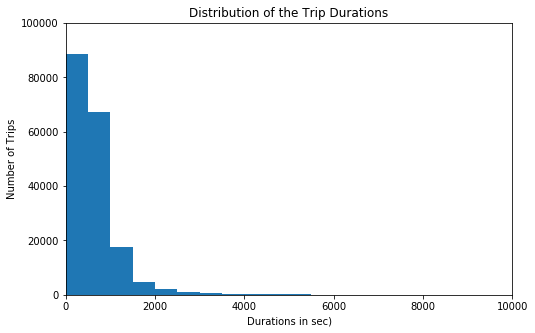

In [13]:
binsize = 500
bins = np.arange(0, df['duration_sec'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'duration_sec', bins = bins)
plt.title('Distribution of the Trip Durations')
plt.xlabel('Durations in sec')
plt.ylabel('Number of Trips')
plt.xlim(left = 0, right = 10000)
plt.ylim(top = 100000);

In [13]:
#making visualizations using the log scale

def log_transform(data, inverse = False):
    if not inverse:
        return np.log(data)
    else:
        return np.e ** data

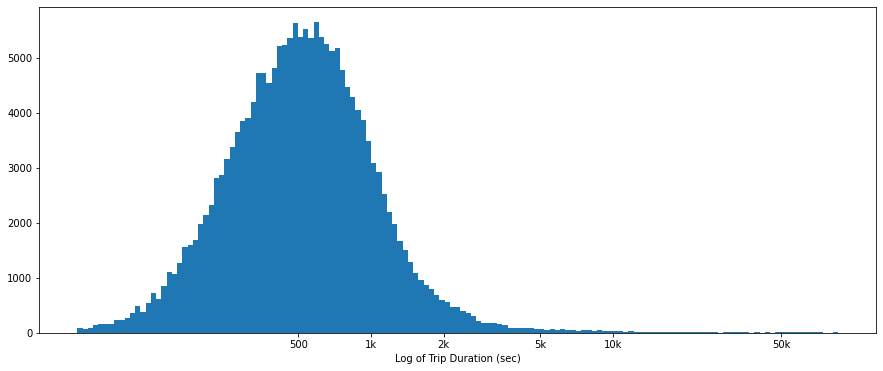

In [14]:
# Plotting frequency of the log of duration_sec
plt.figure(figsize = (15, 6))
df['log_duration'] = log_transform(df.duration_sec)

bin_size = .05
bins = np.arange(df.log_duration.min(), df.log_duration.max() + bin_size, bin_size)
ticks = log_transform([500, 1000, 2000, 5000, 10000, 50000])
labels = [500, '1k', '2k', '5k', '10k', '50k']

plt.hist(data = df, x = 'log_duration', bins = bins)
plt.xlabel('Log of Trip Duration (sec)')
plt.xticks(ticks, labels);

Using the log-transform of the trip's duration gives us a distribution we can more easily understand and relate with, a right-skewed normal distribution, with most of the trips les than 2000 seconds, and the most trips taking around 400 - 700 seconds

#### Analyzing with other features like the start and end station id, birth year, user type and start_hour

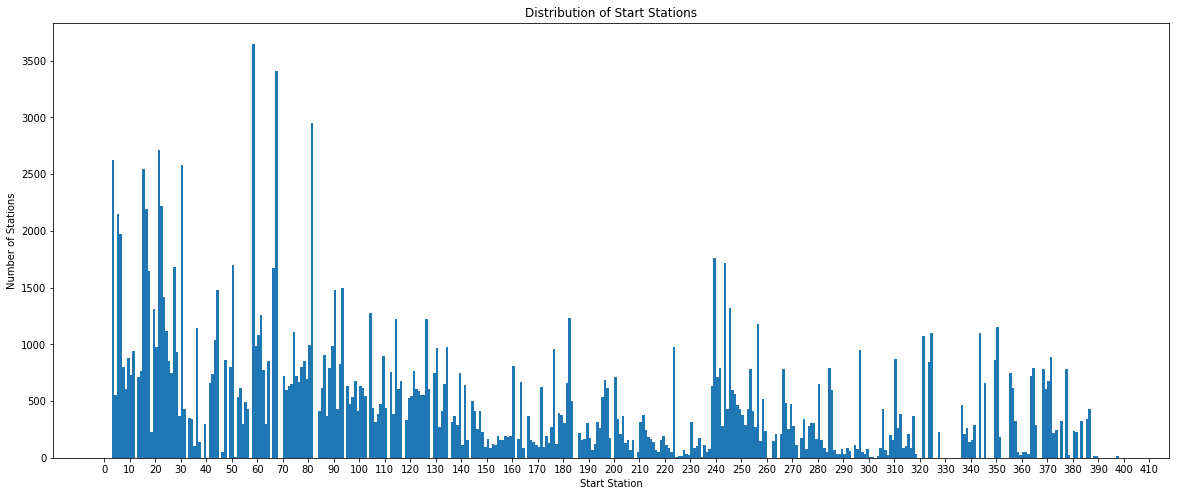

In [14]:
# Plotting start station id distribution.
binsize = 1
bins = np.arange(0, df['start_station_id'].astype(float).max()+binsize, binsize)

plt.figure(figsize=[20, 8])
plt.xticks(range(0, 450, 10))
plt.hist(data = df.dropna(), x = 'start_station_id', bins = bins)
plt.title('Distribution of Start Stations')
plt.xlabel('Start Station')
plt.ylabel('Number of Stations');

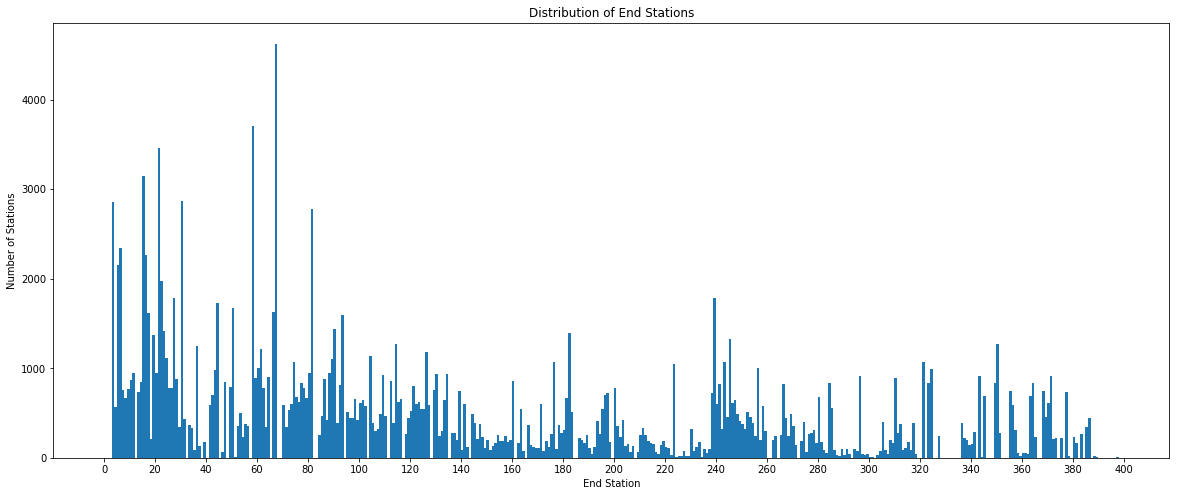

In [17]:
# Plotting end station id distribution.
binsize = 1
bins = np.arange(0, df['end_station_id'].astype(float).max()+binsize, binsize)

plt.figure(figsize=[20, 8])
plt.xticks(range(0, 401, 20))
plt.hist(data = df.dropna(), x = 'end_station_id', bins = bins)
plt.title('Distribution of The End Stations')
plt.xlabel('End Station')
plt.ylabel('Number of Stations');

> We can see that some stations in this dataset see more activity than others.

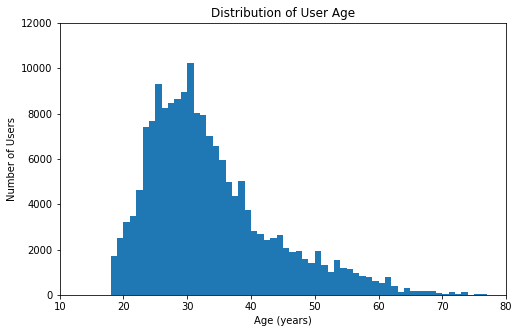

In [17]:
# Plotting the distribution of user age, derived from member's birth year.
binsize = 1
bins = np.arange(0, df['member_birth_year'].astype(float).max()+binsize, binsize)
tick = [1939, 1949, 1959, 1969, 1979, 1989, 1999, 2009]
label = [2019 - i for i in tick]

plt.figure(figsize=[8, 5])
plt.hist(data = df.dropna(), x = 'member_birth_year', bins = bins)
plt.axis([1939, 2009, 0, 12000])
plt.xticks(tick, label)
plt.gca().invert_xaxis()
plt.title('Distribution of User Age')
plt.xlabel('Age (years)')
plt.ylabel('Number of Users');

> We can see from the distribution of the age of users that most users are between 20 to 45 years old.

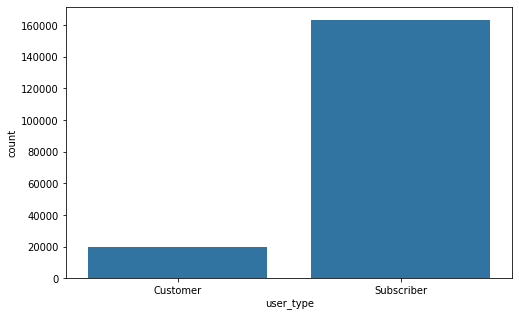

In [18]:
# plotting types of users on bar.
plt.figure(figsize=[8,5])
sb.countplot(x = 'user_type', data = df, color=sb.color_palette()[0]);


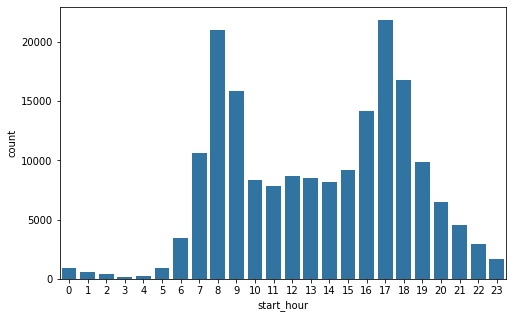

In [19]:
# plotting the hour the trip starts.
plt.figure(figsize=[8,5])
sb.countplot(x = 'start_hour', data = df, color=sb.color_palette()[0]);

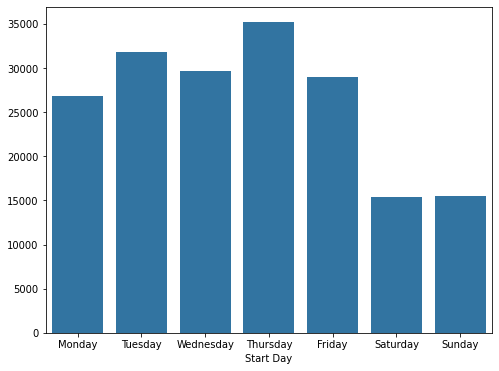

In [20]:
# Plotting the frequency distribution of the start_day feature
plt.figure(figsize = (8, 6))
day_count = df['start_day'].value_counts(sort = False)
sb.barplot(x = day_count.index, y = day_count.values, order = days, color=sb.color_palette()[0])
plt.xlabel('Start Day')
plt.show()

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The trip duration takes a wide range of values and is highly skewed to the right. Transforming it into a log scale and plotting it shows that most rides took between 400-700 seconds to complete.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

We determined the age of the users by subtracting the birth year of the users from 2019.

Wrangling was carried out on the start_time variable, to obtain the hour at which the bike ride began. This was to enable us ask questions like

>"Does the time when the bike ride starts play a part in how long the ride will take?"

The distribution of hours at which bike rides start is bimodal, with peak periods at 8AM and 5PM. This coincides closely with the open and close of working hours. After 5PM, the number of rides keep decreasing up till 3AM in the morning, where it is at its lowest.

Rides during the weekends were less frequent than during weekdays. It would be interesting to observe how this feature and the hour of the day interact.

Start station and end station IDs were also plotted to get insight regarding traffic at certain stations.

## Bivariate Exploration

In this section, I will be investigating relationships between two pairs of variables in this dataset.
Let us take a look at the relationship between trip duration and age.

In [21]:
df['user_age'] = 2019 - df['member_birth_year']

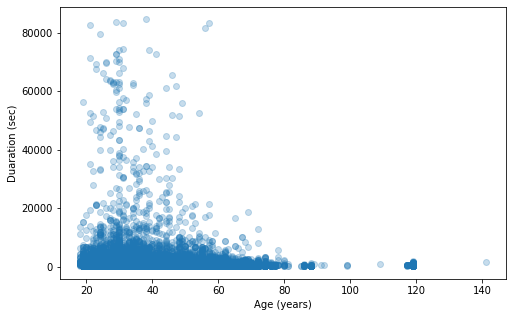

In [22]:
plt.figure(figsize=[8,5])
plt.scatter(df.user_age, df.duration_sec, alpha = 0.25 )
#plt.axis([-5, 145, 500, 10500])
plt.xlabel('Age (years)')
plt.ylabel('Duaration (sec)');

> As most of the durations are below 5000 and age is below 80, lets crop the plot to reflect those values.

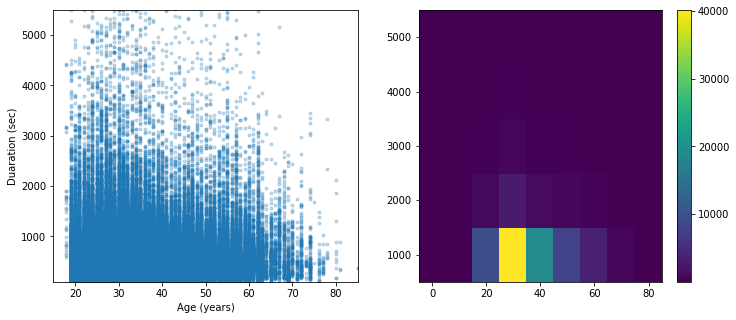

In [23]:
plt.figure(figsize=[12,5])

plt.subplot(1, 2, 1)
plt.scatter(df.user_age, df.duration_sec, alpha = 0.25, marker = '.' )
plt.axis([15, 85, 100, 5500])
plt.xlabel('Age (years)')
plt.ylabel('Duaration (sec)')

plt.subplot(1, 2, 2)
bins_y = np.arange(500, 5500+1, 1000)
bins_x = np.arange(-5, 85+1, 10)
plt.hist2d(df.user_age, df.duration_sec, bins = [bins_x, bins_y])
plt.colorbar(ticks=[10000, 20000, 30000, 40000]);

> By looking at the heatmap, we see that users of bikes aged between 20 and 45 tend to take the longest time completing their rides.

#### Now let us explore the trip's duration dependence on start station and end station.

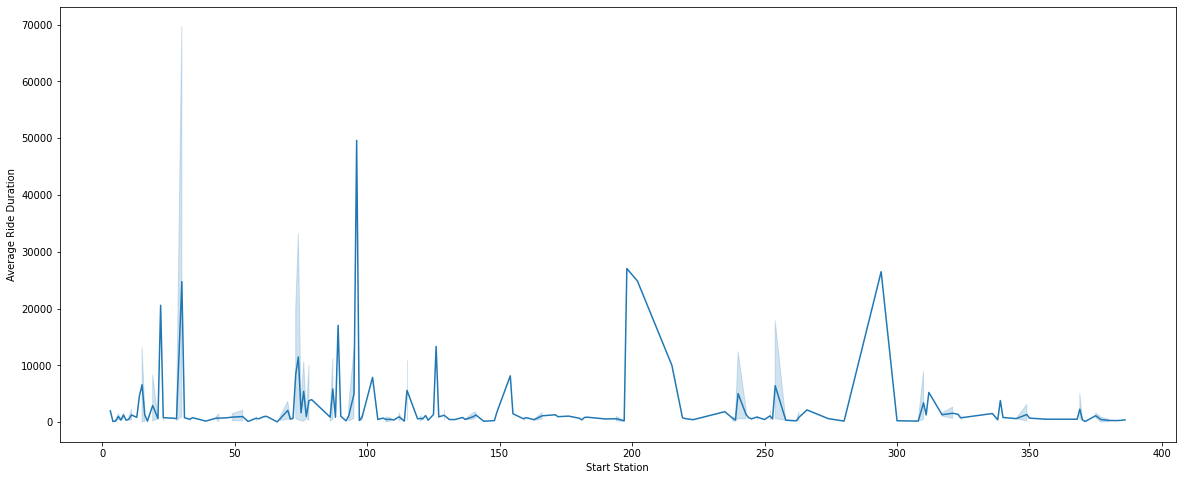

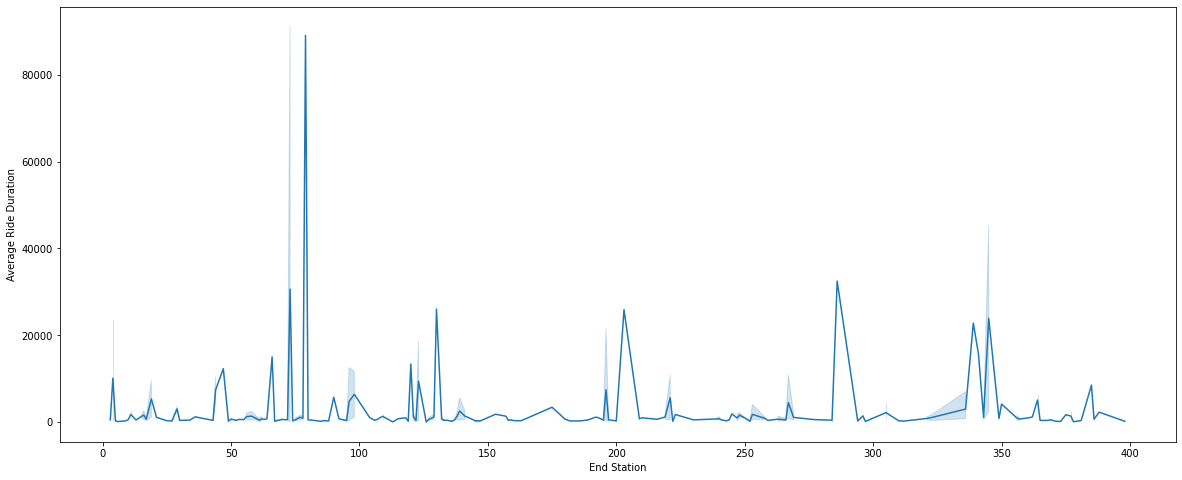

In [24]:
td = df.groupby('start_station_id').sum()['duration_sec'].reset_index().sort_values('start_station_id')
no_of_rides = df['start_station_id'].value_counts().reset_index().sort_values('index')
average_ride_duration = td.duration_sec / no_of_rides.start_station_id

plt.figure(figsize = [20, 8])
sb.lineplot(x = df['start_station_id'].sort_values(), y = average_ride_duration)
plt.xlabel('Start Station')
plt.ylabel('Average Ride Duration');

td = df.groupby('end_station_id').sum()['duration_sec'].reset_index().sort_values('end_station_id')
no_of_rides = df['end_station_id'].value_counts().reset_index().sort_values('index')
average_ride_duration = td.duration_sec / no_of_rides.end_station_id

plt.figure(figsize = [20, 8])
sb.lineplot(x = df['end_station_id'].sort_values(), y = average_ride_duration)
plt.xlabel('End Station')
plt.ylabel('Average Ride Duration');

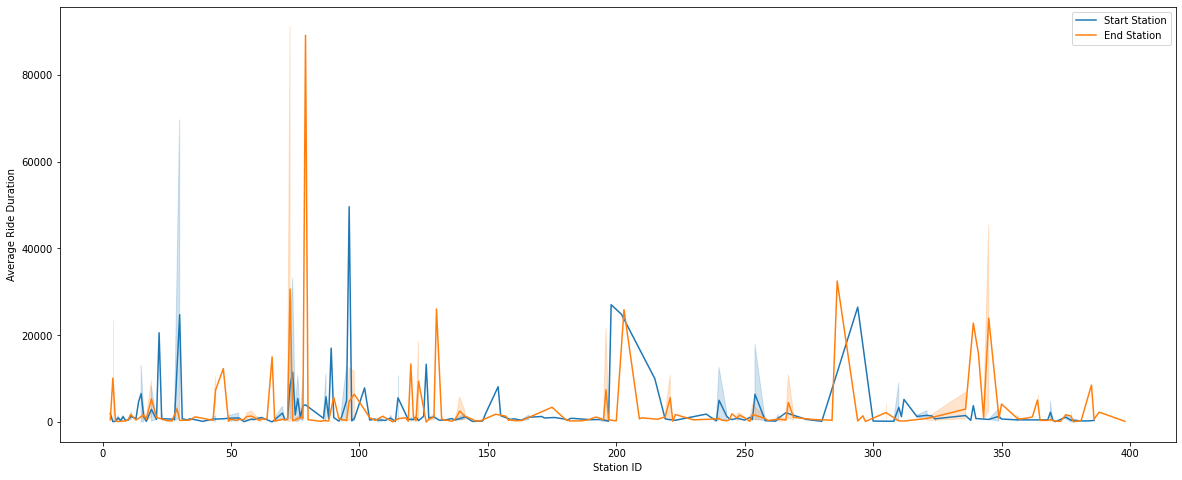

In [25]:
# Calculating the average duration of trips for each start station
start_td = df.groupby('start_station_id').sum()['duration_sec'].reset_index().sort_values('start_station_id')
start_no_of_rides = df['start_station_id'].value_counts().reset_index().sort_values('index')
average_start_ride_duration = start_td.duration_sec / start_no_of_rides.start_station_id
# Calculating the average duration of trips for each end station
end_td = df.groupby('end_station_id').sum()['duration_sec'].reset_index().sort_values('end_station_id')
end_no_of_rides = df['end_station_id'].value_counts().reset_index().sort_values('index')
average_end_ride_duration = end_td.duration_sec / end_no_of_rides.end_station_id

# Superimposing the two averages on a single plot
plt.figure(figsize = [20, 8])
sb.lineplot(x = df['start_station_id'].sort_values(), y = average_start_ride_duration, color = sb.color_palette()[0], label = 'Start Station')
sb.lineplot(x = df['end_station_id'].sort_values(), y = average_ride_duration, color = sb.color_palette()[1], label = 'End Station')
plt.xlabel('Station ID')
plt.ylabel('Average Ride Duration')
plt.legend();


> By looking at these plots you can see that the average trip duration for some station as start station is higher and for some stations as end station is higher. By this we can see what stations result in starting of longer trips and what stations comes end of longer trips.

#### Now let us explore the dependency of trip durations on member type.

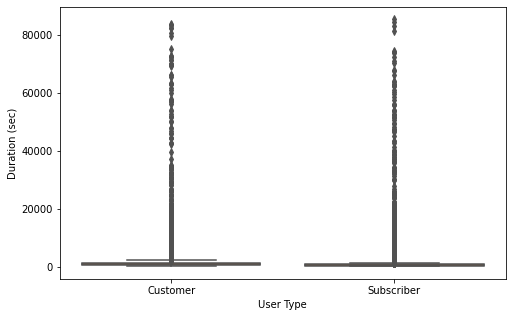

In [26]:
plt.figure(figsize = [8, 5])
base_color = sb.color_palette()[1]
sb.boxplot(data = df, x = 'user_type', y = 'duration_sec', color = base_color)
plt.xlabel('User Type')
plt.ylabel('Duration (sec)');

> As we can see, values are vey widespread to see a box plot, so lets trim duration to max 2500 sec to get clearer picture.

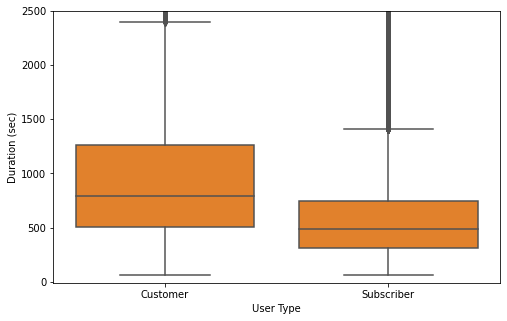

In [27]:
plt.figure(figsize = [8, 5])
base_color = sb.color_palette()[1]
sb.boxplot(data = df, x = 'user_type', y = 'duration_sec', color = base_color)
plt.ylim([-10, 2500])
plt.xlabel('User Type')
plt.ylabel('Duration (sec)');

>Here we can see that higher percentage of customers are taking longer trips then compared to subscribers.

#### Let us now explore relationships among the features

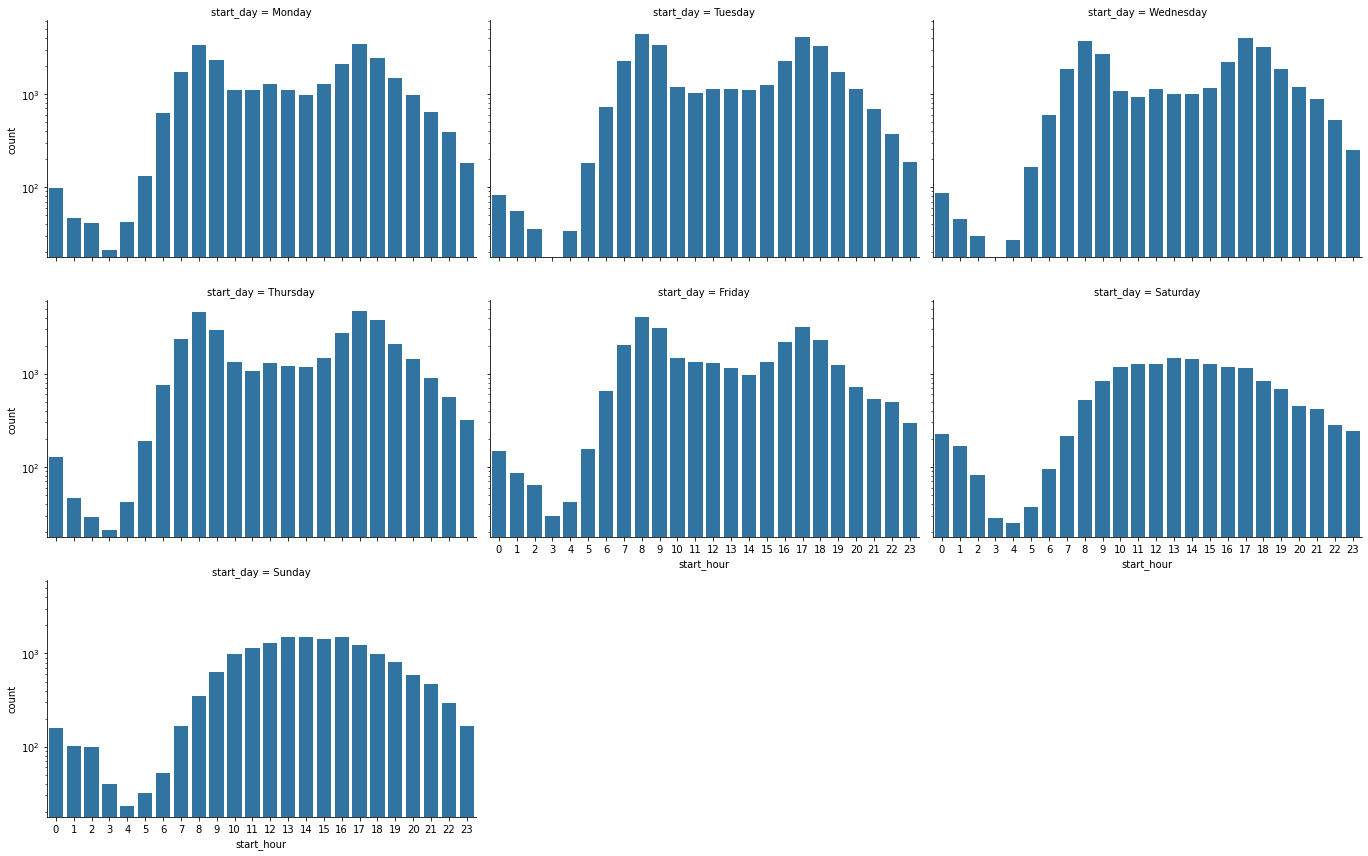

In [28]:
# Plotting start_day against start hour
g = sb.FacetGrid(data = df, col = 'start_day', height = 4, aspect = 1.6, col_wrap = 3)
g.map(sb.countplot, 'start_hour')
plt.yscale('log');

>I observed a bimodal distribution of rides during weekdays with peak periods at 8AM and 5PM. However, on weekends, peak period is around 1-2PM, and it is not bimodal.

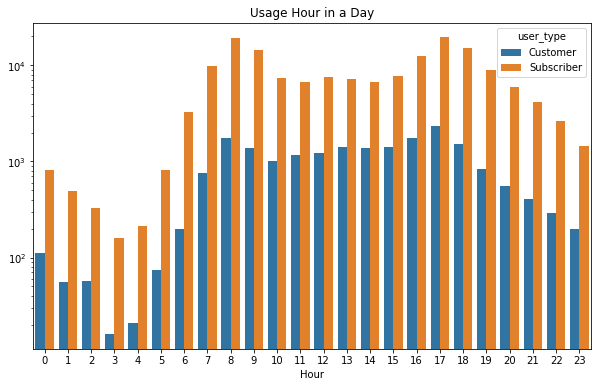

In [29]:
plt.figure(figsize=(10,6))
plt.title('Usage Hour in a Day')
chart = sb.countplot(data=df, x='start_hour', hue='user_type')
plt.yscale('log')

chart.set(xlabel='Hour', ylabel='');

>Both set of users seem to use the service most around peak periods.

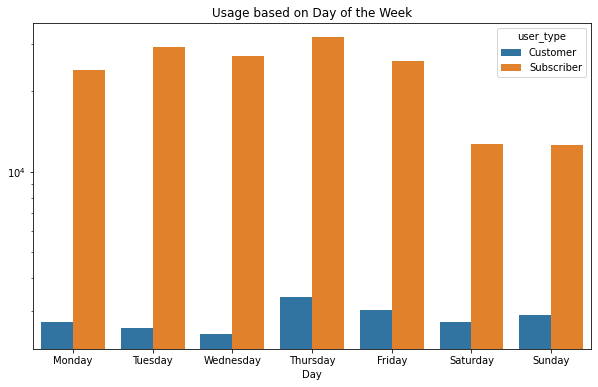

In [30]:
plt.figure(figsize=(10,6))
plt.title('Usage based on Day of the Week')
chart = sb.countplot(data=df, x='start_day', hue='user_type')
plt.yscale('log')

chart.set(xlabel='Day', ylabel='');

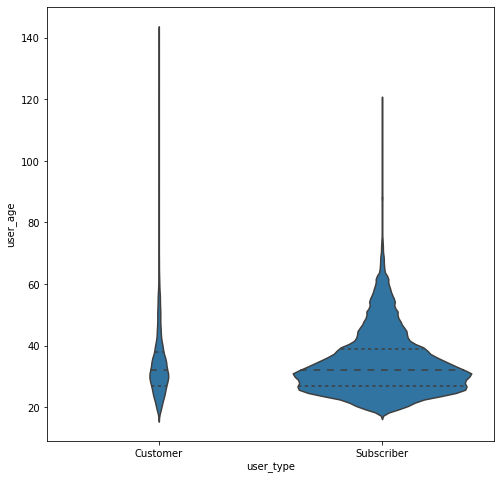

In [31]:
plt.figure(figsize = (8,8))

sb.violinplot(data = df, x = 'user_type', y = 'user_age', inner = 'quartile', scale = 'count', color = sb.color_palette()[0]);

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

<li>I found out that the trips with the longest durations are usually taken by relatively younger users between the ages of 20 and 45.
<li>Also, while the start and station are too many to be looked at in detail, I notice that while the average duration of rides for most stations are similarly low, it is particularly high for some stations.
<li>Rides taken during weekdays were on average observed to take longer than rides on weekends.
<li>Customers were also observed to, on average, take rides that lasted longer than rides taken by subscribers

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

We observed a bimodal distribution of rides during weekdays with peak periods at 8AM and 5PM. However, on weekends, peak period is around 1-2PM, and it is not bimodal.

## Multivariate Exploration

The main thing I want to explore in this part of the analysis is how the time and day of the week jointly influences the duration of the ride.

Other relationships I will investigate include:

<li>trip's duration, user's age, and user type
<li>trip's duration, time of the day, and user type
<li>user's age, user type and time of the day

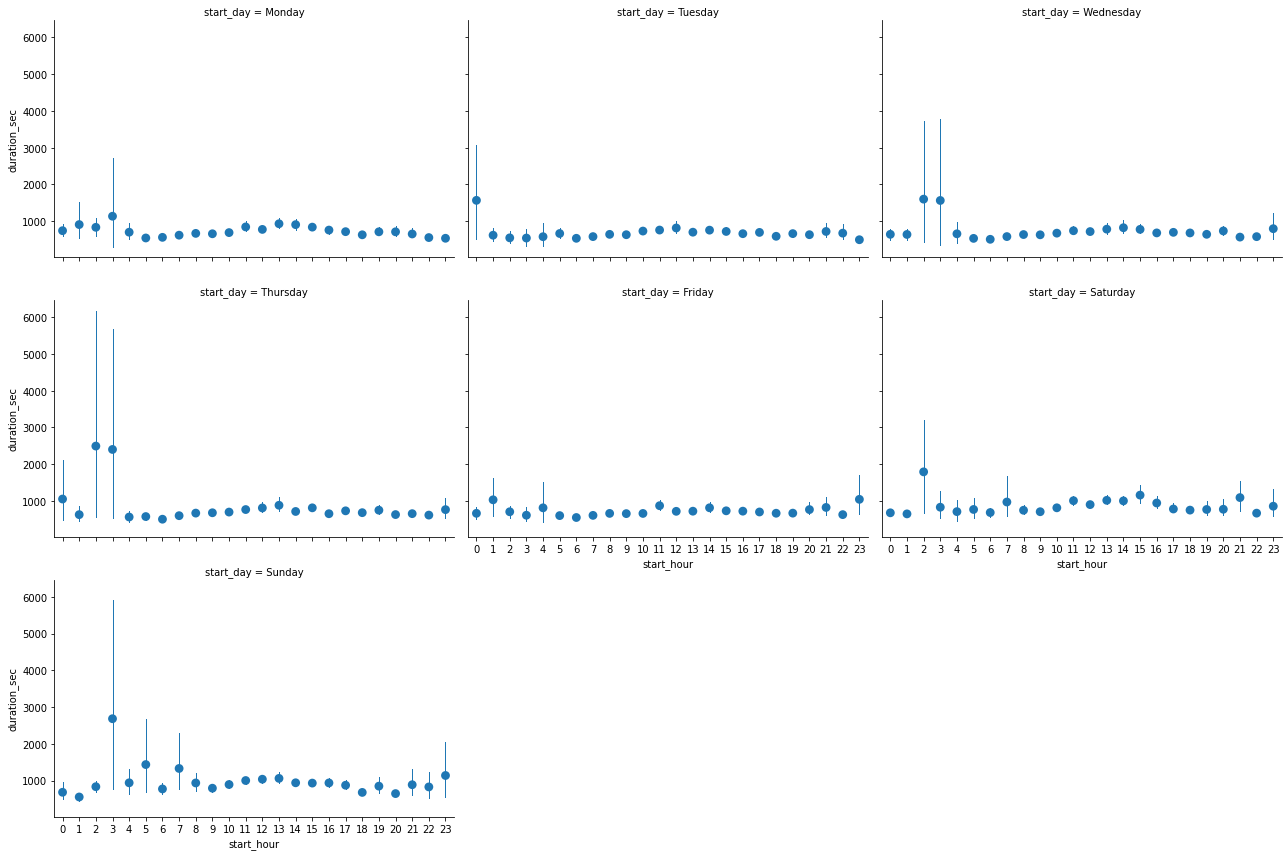

In [32]:
g = sb.FacetGrid(data = df, col = 'start_day', col_wrap = 3, size = 4, aspect = 1.5)
g.map(sb.pointplot, 'start_hour', 'duration_sec', join = False, errwidth = 1);

>There seems to be significant variance in the average duration of rides that start early in the morning, between 12 and 3AM.
Duration of rides for the rest of the day are fairly consistent.

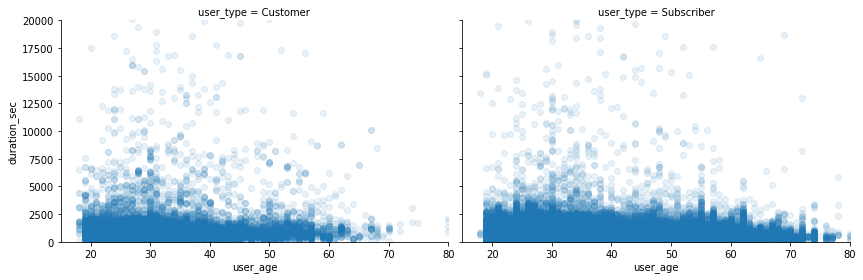

In [33]:
g = sb.FacetGrid(data = df, col = 'user_type', size = 4, aspect = 1.5)
g.map(plt.scatter, 'user_age', 'duration_sec', alpha = .1)
plt.axis((15, 80, 0, 20000));

> While customers and subscribers are showing similar trends for age and trip duration, there is a slight tilt to higher age for subscribers. Above 60 years, more users are subscibers than customers, and they tend to go on rides that don't take too long.

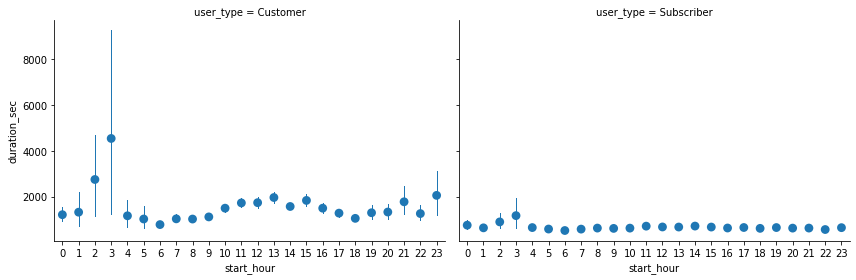

In [34]:
# Plotting user type against start hour
g = sb.FacetGrid(data = df, col = 'user_type', size = 4, aspect = 1.5)
g.map(sb.pointplot, 'start_hour', 'duration_sec', join = False, errwidth = 1);

In [35]:
df.groupby('user_type').describe()

bike_id                                                          \
               count         mean          std   min     25%     50%     75%   
user_type                                                                      
Customer     19868.0  4225.550181  1817.784966  11.0  2861.0  4860.0  5474.0   
Subscriber  163544.0  4502.956226  1642.243173  11.0  3892.0  4964.0  5505.0   

                   duration_sec               ...   start_station_longitude  \
               max        count         mean  ...                       75%   
user_type                                     ...                             
Customer    6644.0      19868.0  1432.465019  ...               -122.391034   
Subscriber  6645.0     163544.0   640.263678  ...               -122.279720   

                        user_age                                          \
                   max     count       mean        std   min   25%   50%   
user_type                                                                  
Customer   -121.874119   16631.0  33.638927   9.478858  18.0  27.0  32.0   
Subscriber -121.874119  158516.0  34.251754  10.179569  18.0  27.0  32.0   

                         
             75%    max  
user_type                
Customer    38.0  141.0  
Subscriber  39.0  119.0  

[2 rows x 88 columns]

> From the charts above, we see that there is moderate variation in the duration of rides by subscribers, typically less than 750s. However, most of the variance observed in the duration of rides stem from customers, where there are a lot more rides that take extremely long amounts of time.

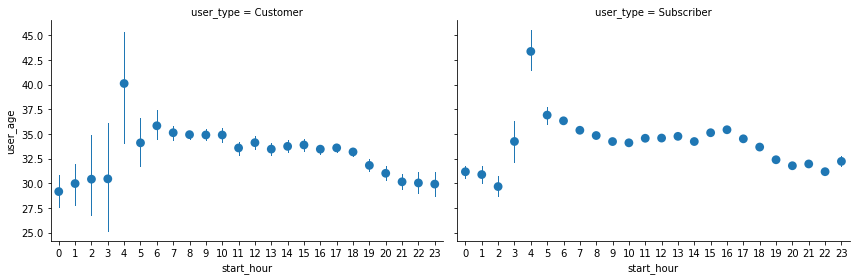

In [36]:
g = sb.FacetGrid(data = df, col = 'user_type', size = 4, aspect = 1.5)
g.map(sb.pointplot, 'start_hour', 'user_age', join = False, errwidth = 1);

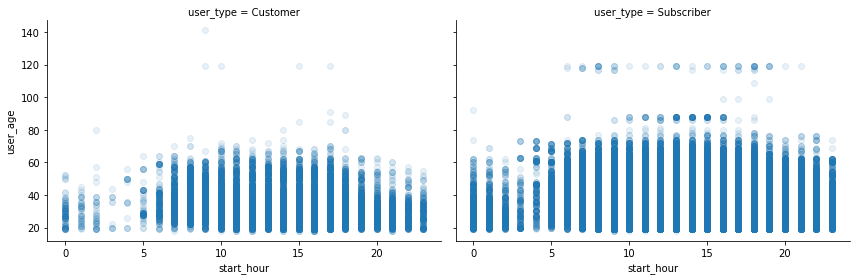

In [37]:
g = sb.FacetGrid(data = df, col = 'user_type', size = 4, aspect = 1.5)
g.map(plt.scatter, 'start_hour', 'user_age', alpha = .1);

> The charts seem to suggest that more younger people make use of the bike riding system late at night and early in the morning. However from 4AM where we notive a spike in the average age of both user types, the age of the users is slightly higher than usual, until around 5PM when it starts to decline again.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

<li> From the multivariate analysis of start day, start hour and duration_sec, we observe that the longest trips tend to start in the early hours of the morning, typically before 6AM.
<li> Also, customers tend to have the longest trip durations, with a peak at 3AM in the morning. On the other hand, the average ride duration for subscribers is quite low when compared to that of the customers, and is quite similar across the hours of the day.

### Were there any interesting or surprising interactions between features?

<li>There are generally more older subscribers than customers.
<li>The average age of users using the bike sharing service is at its highest at 4AM, for both user types.

## Conclusions
From the Ford GoBike dataset exploration, it shows how different variables have effect on the time duration that is, the time duration is dependednt on varibales such as user type, birth year and the time and day etc.

From the univariate to bivariate and multivariate exploration, I was able to get different insights which made me to answer different questions.